In [1]:
import pandas as pd
import shapely
import geopandas as gpd
import matplotlib.pyplot as plt

In [118]:
DH = pd.read_csv("../results/Denhaag.csv", index_col = 0)
EH = pd.read_csv("../results/Eindhoven.csv", index_col = 0)
NM = pd.read_csv("../results/Nijmegen.csv", index_col = 0)

# non cluster models

In [111]:
DH1 = DH[~DH.index.str.contains("ust")]
EH1 = EH[~EH.index.str.contains("ust")]
NM1 = NM[~NM.index.str.contains("ust")]

In [5]:
tot = DH1.join(EH1, rsuffix = "_EIND").join(NM1, rsuffix = "_NM")
tot = tot.transpose()
tot

model,RF,MLP,CNN,RNN,RNNCNN,XGB,LR
auc,0.677484,0.679318,0.592242,0.676105,0.664910,0.680866,0.671630
f1,0.383407,0.400098,0.337261,0.401423,0.389228,0.384389,0.375061
auc_EIND,0.684324,0.670751,0.603258,0.689692,0.663678,0.683336,0.670184
f1_EIND,0.214421,0.265655,0.210626,0.238095,0.242236,0.208729,0.204934
auc_NM,0.659007,0.662382,0.601488,0.679314,0.648543,0.668151,0.667587
f1_NM,0.236908,0.264339,0.177057,0.258799,0.231405,0.241895,0.146119


In [6]:
arrays = [["Den haag", "Den haag", "Eindhoven", "Eindhoven", "Nijmegen", "Nijmegen"],
            ["AUC", "F1", "AUC", "F1", "AUC", "F1"]
          ]
tuples = list(zip(*arrays))

In [7]:
tuples

[('Den haag', 'AUC'),
 ('Den haag', 'F1'),
 ('Eindhoven', 'AUC'),
 ('Eindhoven', 'F1'),
 ('Nijmegen', 'AUC'),
 ('Nijmegen', 'F1')]

In [8]:
index = pd.MultiIndex.from_tuples(tuples, names=["City", "Score"])
tot.index = index

In [9]:
cols = ["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN", "LR"]

In [10]:
b = tot[cols]
b

model                  RF       XGB       MLP       CNN       RNN    RNNCNN  \
City      Score                                                               
Den haag  AUC    0.677484  0.680866  0.679318  0.592242  0.676105  0.664910   
          F1     0.383407  0.384389  0.400098  0.337261  0.401423  0.389228   
Eindhoven AUC    0.684324  0.683336  0.670751  0.603258  0.689692  0.663678   
          F1     0.214421  0.208729  0.265655  0.210626  0.238095  0.242236   
Nijmegen  AUC    0.659007  0.668151  0.662382  0.601488  0.679314  0.648543   
          F1     0.236908  0.241895  0.264339  0.177057  0.258799  0.231405   

model                  LR  
City      Score            
Den haag  AUC    0.671630  
          F1     0.375061  
Eindhoven AUC    0.670184  
          F1     0.204934  
Nijmegen  AUC    0.667587  
          F1     0.146119

In [20]:
ML = tot[["LR", "RF", "XGB", "MLP"]].round(3)
ML.to_excel("../results/MLtable.xlsx")

In [19]:
DL = tot[["LR", "CNN","RNN","RNNCNN"]].round(3)
DL.to_excel("../results/DLtable.xlsx")

In [31]:
# b.to_excel("../results/non_cluster_table.xlsx")

# Cluster

In [127]:
DH2 = DH[DH.index.str.contains("ust")].append(DH.loc["LR"])
EH2 = EH[EH.index.str.contains("ust")].append(EH.loc["LR"])
NM2 = NM[NM.index.str.contains("ust")].append(NM.loc["LR"])

In [128]:
DH2

,auc,f1
model,,
XGB_cluster,0.627888,0.350025
RF_cluster,0.666014,0.363770
MLP_cluster,0.597170,0.327442
RNNCNN_cluster,0.668355,0.379065
RNN_cluster,0.598413,0.356199
CNN_cluster,0.599998,0.338733
LR,0.671630,0.375061


In [129]:
tot = DH2.join(EH2, rsuffix = "_EIND").join(NM2, rsuffix = "_NM")
tot = tot.transpose()


In [130]:
cols = ['LR','RF_cluster', 'XGB_cluster','MLP_cluster', 'CNN_cluster', 'RNN_cluster', 'RNNCNN_cluster']
tot = tot[cols]

In [131]:
tot

model,LR,RF_cluster,XGB_cluster,MLP_cluster,CNN_cluster,RNN_cluster,RNNCNN_cluster
auc,0.671630,0.666014,0.627888,0.597170,0.599998,0.598413,0.668355
f1,0.375061,0.363770,0.350025,0.327442,0.338733,0.356199,0.379065
auc_EIND,0.670184,0.676315,0.634573,0.684361,0.590821,0.652714,0.642475
f1_EIND,0.204934,0.214421,0.187856,0.254269,0.174573,0.204969,0.198758
auc_NM,0.667587,0.645624,0.635031,0.651661,0.566657,0.657119,0.574660
f1_NM,0.146119,0.229426,0.211970,0.256858,0.139651,0.250689,0.217631


In [124]:
tot = tot[cols]
cols = ['LR', 'RF', 'XGB','MLP', 'CNN', 'RNN', 'RNNCNN']
tot.columns = cols

In [132]:
index = pd.MultiIndex.from_tuples(tuples, names=["City", "Score"])
tot.index = index
tot = tot.round(3)

In [133]:
tot

model               LR  RF_cluster  XGB_cluster  MLP_cluster  CNN_cluster  \
City      Score                                                             
Den haag  AUC    0.672       0.666        0.628        0.597        0.600   
          F1     0.375       0.364        0.350        0.327        0.339   
Eindhoven AUC    0.670       0.676        0.635        0.684        0.591   
          F1     0.205       0.214        0.188        0.254        0.175   
Nijmegen  AUC    0.668       0.646        0.635        0.652        0.567   
          F1     0.146       0.229        0.212        0.257        0.140   

model            RNN_cluster  RNNCNN_cluster  
City      Score                               
Den haag  AUC          0.598           0.668  
          F1           0.356           0.379  
Eindhoven AUC          0.653           0.642  
          F1           0.205           0.199  
Nijmegen  AUC          0.657           0.575  
          F1           0.251           0.218

In [134]:
tot.to_excel("../results/Clustertable.xlsx")

# differences

In [41]:
DHauc = pd.read_csv("../results/DenhaagAUC.csv", index_col = 0)
DHf1 = pd.read_csv("../results/Denhaagf1.csv", index_col = 0)

DH1.columns = ["auc_CA", "f1_CA"]
DH2.columns = ["auc_clust", "f1_clust"]

DH2.index = DH2.index.str.strip("_cluster")
DHauc.index = DHauc.index.str.strip("_cluster")
DHauc.columns = ["auc_cluster 1", "auc_cluster 2", "auc_cluster 3"]
DHf1.index = DHf1.index.str.strip("_cluster")
DHf1.columns = ["f1_cluster 1", "f1_cluster 2", "f1_cluster 3"]
totDH = DH1.join(DH2.join(DHauc.join(DHf1)))
totDH = totDH.loc[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

In [42]:
EHauc = pd.read_csv("../results/EindhovenAUC.csv", index_col = 0)
EHf1 = pd.read_csv("../results/Eindhovenf1.csv", index_col = 0)

EH1.columns = ["auc_CA", "f1_CA"]
EH2.columns = ["auc_clust", "f1_clust"]

EH2.index = EH2.index.str.strip("_cluster")
EHauc.index = EHauc.index.str.strip("_cluster")
EHauc.columns = ["auc_cluster 1", "auc_cluster 2"]
EHf1.index = EHf1.index.str.strip("_cluster")
EHf1.columns = ["f1_cluster 1", "f1_cluster 2"]
totEH = EH1.join(EH2.join(EHauc.join(EHf1)))
totEH = totEH.loc[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

In [43]:
NMauc = pd.read_csv("../results/NijmegenAUC.csv", index_col = 0)
NMf1 = pd.read_csv("../results/Nijmegenf1.csv", index_col = 0)

NM1.columns = ["auc_CA", "f1_CA"]
NM2.columns = ["auc_clust", "f1_clust"]

NM2.index = NM2.index.str.strip("_cluster")
NMauc.index = NMauc.index.str.strip("_cluster")
NMauc.columns = ["auc_cluster 1", "auc_cluster 2", "auc_cluster 3"]
NMf1.index = NMf1.index.str.strip("_cluster")
NMf1.columns = ["f1_cluster 1", "f1_cluster 2", "f1_cluster 3"]
totNM = NM1.join(NM2.join(NMauc.join(NMf1)))
totNM = totNM.loc[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

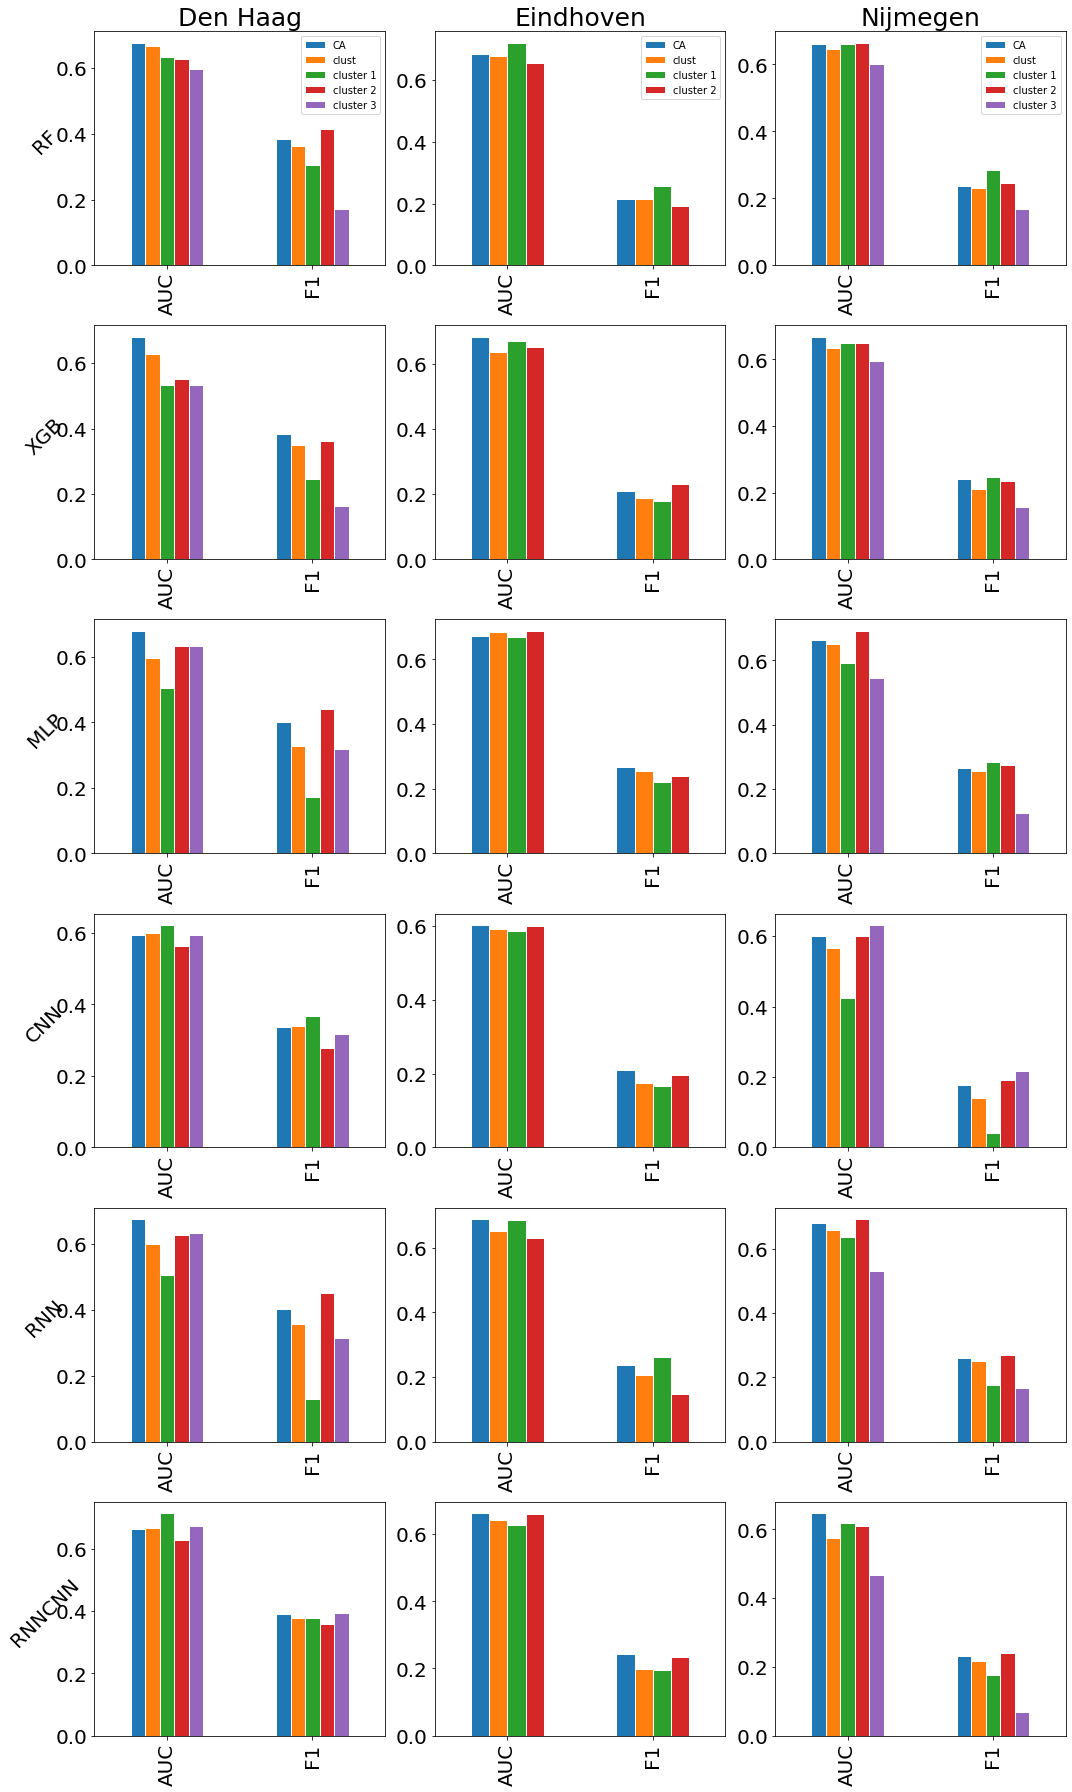

In [53]:
fig, ax = plt.subplots(6,3, figsize = (15,25))
for j, city in enumerate([totDH, totEH, totNM]):
    for i,(model,row) in enumerate(city.iterrows()):

        auc = pd.DataFrame(row[row.index.str.contains("auc")]).T
        f1 = pd.DataFrame(row[row.index.str.contains("f1")]).T
        auc.index = ["AUC"]
        f1.index = ["F1"]

        auc.columns = auc.columns.str.replace("auc_", "")
        f1.columns = f1.columns.str.replace("f1_", "")

        row = pd.concat([auc,f1])
        if i == 0:
            row.plot(kind = "bar", ax = ax[i,j], edgecolor = "white")
        else:
            row.plot(kind = "bar", ax = ax[i,j], edgecolor = "white", legend = False)
        if j == 0:
            ax[i,j].set_ylabel(model, rotation=45, size = 20)
            
        ax[i,j].tick_params(axis = 'both', which = 'major', labelsize = 20)
            
ax[0,0].set_title("Den Haag", size = 25)
ax[0,1].set_title("Eindhoven", size = 25)
ax[0,2].set_title("Nijmegen", size = 25)
fig.tight_layout()
# ax[0,0].ylabel("RF")
# fig.savefig("../figures/clustertotalresults.png")

In [54]:
fig.savefig("../figures/clustertotalresults.png")

## difference table

In [59]:
EH1.columns = ["auc", "f1"]
EH2.columns = ["auc", "f1"]
NM1.columns = ["auc", "f1"]
NM2.columns = ["auc", "f1"]
DH1.columns = ["auc", "f1"]
DH2.columns = ["auc", "f1"]

In [69]:
changeEH = (EH2 - EH1) / EH1
changeDH = (DH2 - DH1) / DH1
changeNM = (NM2 - NM1) / NM1

In [85]:
totchange = changeDH.join(changeEH.join(changeNM, rsuffix = "_NM"), rsuffix = "_EH").T * 100

In [86]:
totchange = totchange[["RF", "XGB", "MLP", "CNN", "RNN", "RNNCNN"]]

In [87]:
index = pd.MultiIndex.from_tuples(tuples, names=["City", "Score"])
totchange.index = index

In [89]:
totchange.to_excel("../results/clusterchanges.xlsx")

# resulting cities plaatjes

In [3]:
import pickle
import os
import pandas as pd
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt

import numpy as np

In [4]:
def load_data(city):
    os.getcwd()
    df = pd.DataFrame()
    path = "../Data/filled/" + city + ".csv"
    

    df1 = pd.read_csv(path )
    if df1.geometry.isna().any():
        print(filename)
    df = pd.concat([df, df1])
    df = gpd.GeoDataFrame(df)
    df.geometry = df.geometry.apply(shapely.wkt.loads)
    
    df = df.reset_index()
    df = df.drop(["Unnamed: 0", "index"], axis = 1)
    return df

In [5]:
DH15 = load_data("'s-Gravenhage15.csv_filled_").set_index("C28992R100")
DH16 = load_data("'s-Gravenhage16.csv_filled_").set_index("C28992R100")
DH17 = load_data("'s-Gravenhage17.csv_filled_").set_index("C28992R100")
DH18 = load_data("'s-Gravenhage18.csv_filled_").set_index("C28992R100")
DH19 = load_data("'s-Gravenhage19.csv_filled_").set_index("C28992R100")
overlapping1517 = DH17.index[DH17.index.isin(DH16.index[DH16.index.isin(DH15.index)])]
overlapping1518 = DH18.index[DH18.index.isin(overlapping1517)]
overlapping1519 = DH19.index[DH19.index.isin(overlapping1518)]
DH = DH19.loc[overlapping1519]

NM15 = load_data("Nijmegen15.csv_filled_").set_index("C28992R100")
NM16 = load_data("Nijmegen16.csv_filled_").set_index("C28992R100")
NM17 = load_data("Nijmegen17.csv_filled_").set_index("C28992R100")
NM18 = load_data("Nijmegen18.csv_filled_").set_index("C28992R100")
NM19 = load_data("Nijmegen19.csv_filled_").set_index("C28992R100")
overlapping1517 = NM17.index[NM17.index.isin(NM16.index[NM16.index.isin(NM15.index)])]
overlapping1518 = NM18.index[NM18.index.isin(overlapping1517)]
overlapping1519 = NM19.index[NM19.index.isin(overlapping1518)]
NM = NM19.loc[overlapping1519]

EH15 = load_data("eindhoven15.csv_filled_").set_index("C28992R100")
EH16 = load_data("eindhoven16.csv_filled_").set_index("C28992R100")
EH17 = load_data("eindhoven17.csv_filled_").set_index("C28992R100")
EH18 = load_data("eindhoven18.csv_filled_").set_index("C28992R100")
EH19 = load_data("eindhoven19.csv_filled_").set_index("C28992R100")
overlapping1517 = EH17.index[EH17.index.isin(EH16.index[EH16.index.isin(EH15.index)])]
overlapping1518 = EH18.index[EH18.index.isin(overlapping1517)]
overlapping1519 = EH19.index[EH19.index.isin(overlapping1518)]
EH = EH19.loc[overlapping1519]

In [6]:
with open('../results/DHRNNpreds', 'rb') as f:
    DHpreds = pickle.load(f)
    
    
with open('../results/NMRNNpreds', 'rb') as f:
    NMpreds = pickle.load(f)
        
    
with open('../results/EHRNNpreds', 'rb') as f:
    EHpreds = pickle.load(f)
    
    


In [7]:
y = NM.y.values
preds = np.zeros(len(y))
posIDX = NMpreds.argsort()[-(np.sum(y==1)) : ]
preds[posIDX] = 1
NMpreds = preds
y = DH.y.values
preds = np.zeros(len(y))
posIDX = DHpreds.argsort()[-(np.sum(y==1)) : ]
preds[posIDX] = 1
DHpreds = preds
y = EH.y.values
preds = np.zeros(len(y))
posIDX = EHpreds.argsort()[-(np.sum(y==1)) : ]
preds[posIDX] = 1
EHpreds = preds

In [8]:

def checker(d):
    if d["y"] == 0 and d["preds"] == 0:
        return 0
    if d["y"] == 0 and d["preds"] == 1:
        return 1
    if d["y"] == 1 and d["preds"] == 0:
        return 2
    if d["y"] == 1 and d["preds"] == 1:
        return 3
    

In [9]:

DH["preds"] = DHpreds
DH["checked"] = DH.apply(checker, axis =1)
NM["preds"] = NMpreds    
NM["checked"] = NM.apply(checker, axis =1)
EH["preds"] = EHpreds    
EH["checked"] = EH.apply(checker, axis =1)

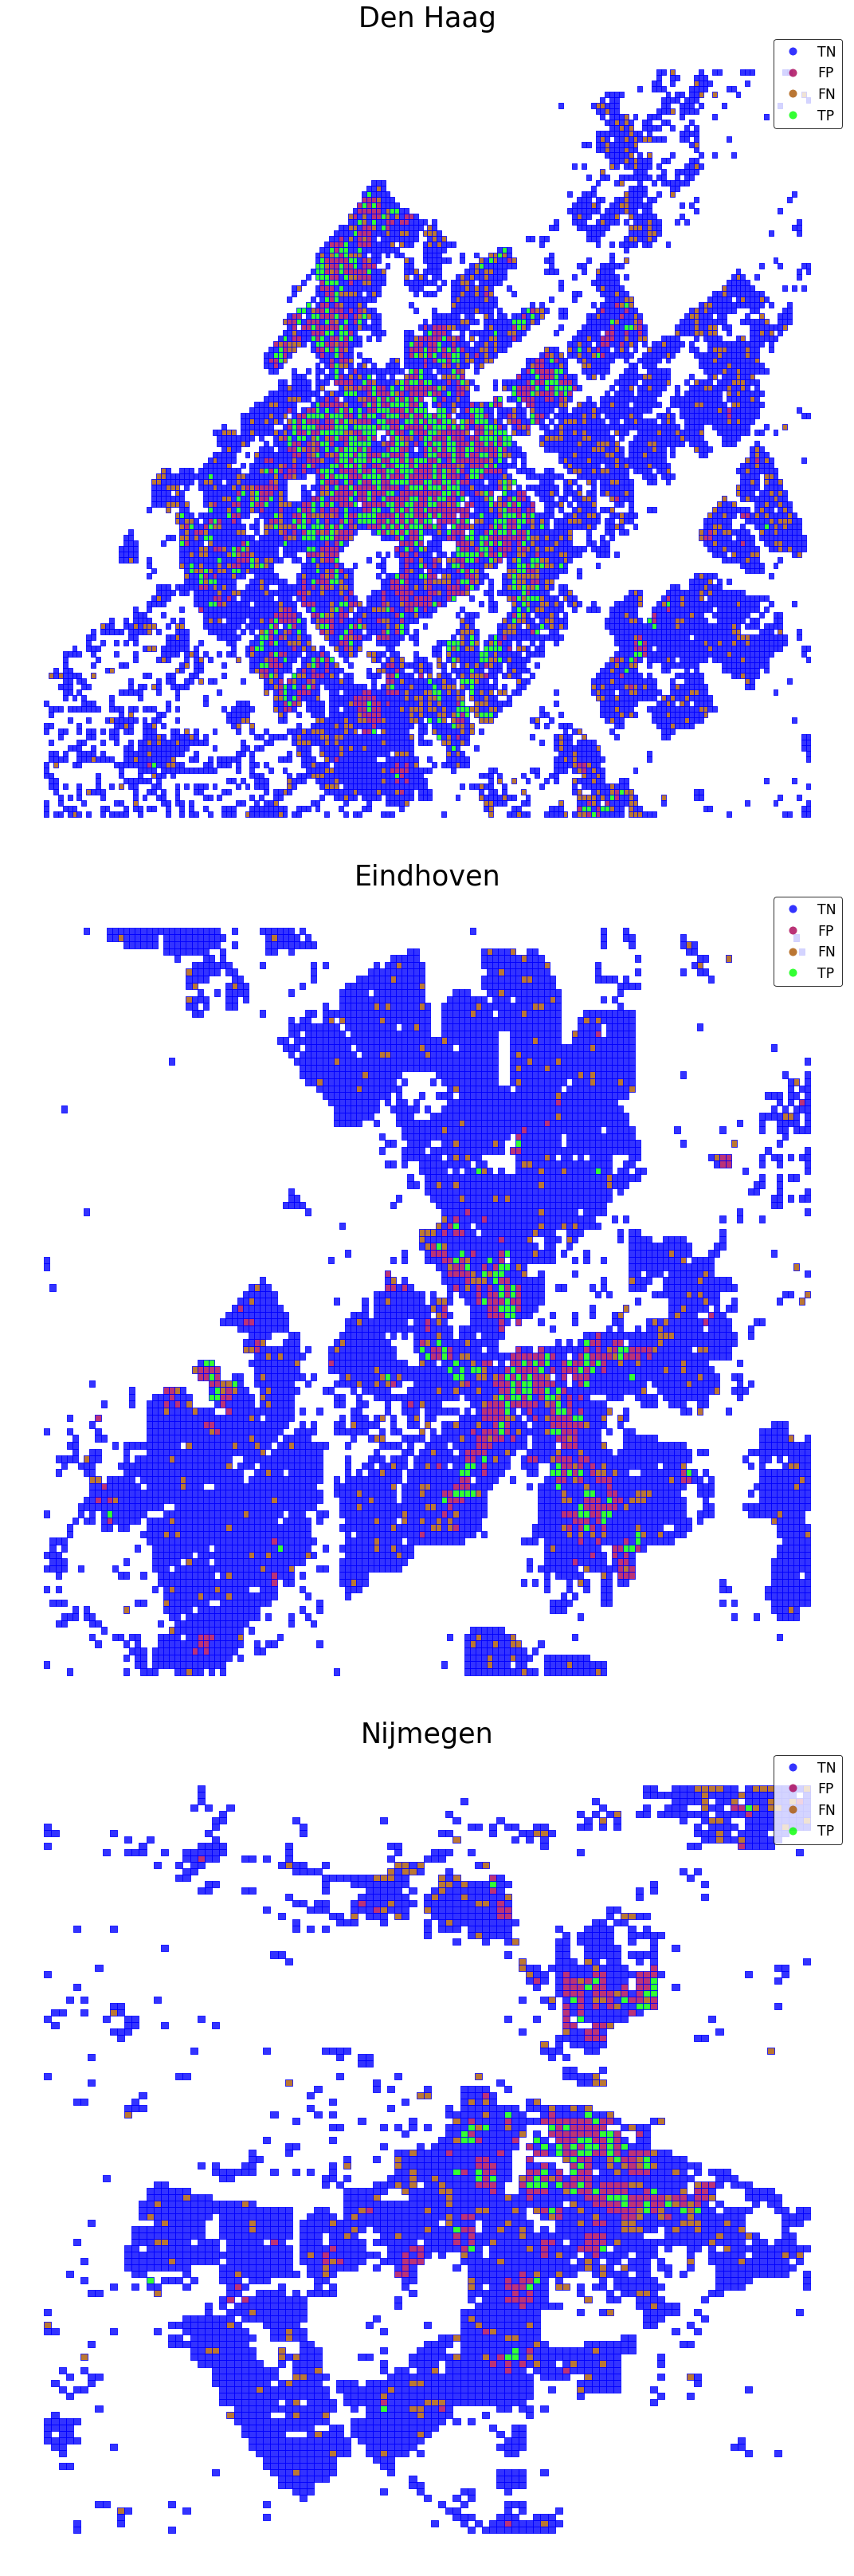

In [10]:
fig, ax = plt.subplots(3,1, figsize = (15,45))
mapper = {0: "TN", 1: "FP", 2 : "FN", 3: "TP"}
DH.plot( cmap = "brg", column = "checked", ax = ax[0], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
EH.plot( cmap = "brg", column = "checked", ax = ax[1], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
NM.plot( cmap = "brg", column = "checked", ax = ax[2], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
                
legend = ax[0].get_legend()             
replace_legend_items(legend, mapper)
legend = ax[1].get_legend()   
replace_legend_items(legend, mapper)
legend = ax[2].get_legend()   
replace_legend_items(legend, mapper)
ax[0].set_title("Den Haag", size = 35)
ax[1].set_title("Eindhoven", size = 35)
ax[2].set_title("Nijmegen", size = 35)

ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

ax[0].set_aspect('auto')
ax[1].set_aspect('auto')
ax[2].set_aspect('auto')
fig.tight_layout()

# plt.savefig("../figures/errormaps.png")

<AxesSubplot:>

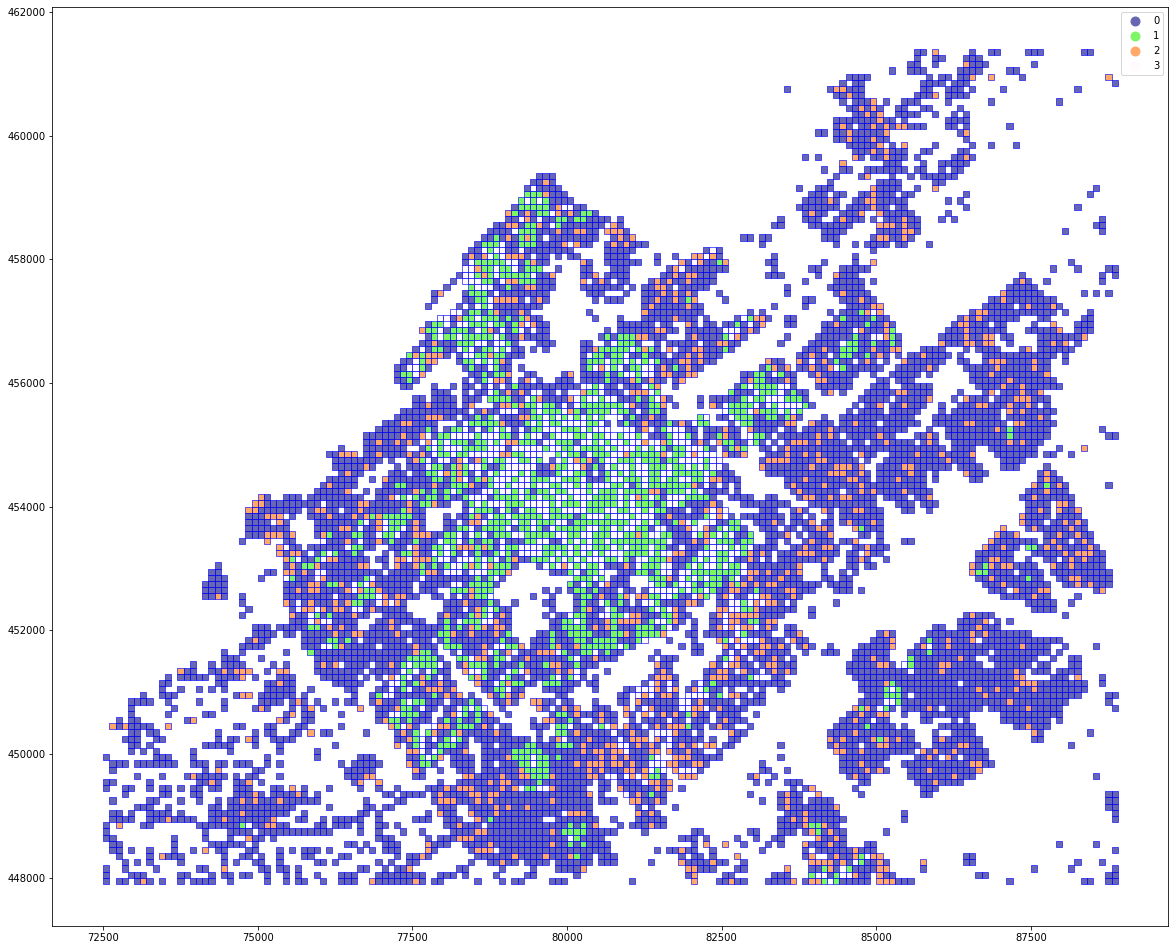

In [33]:
DH.plot(column = "checked", cmap = "gist_ncar", categorical = True, legend = True,alpha = 0.6, edgecolor = "b", figsize = (20,20))

# error maps per city


In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [212]:
def print_error_maps(citycode, city, RNNcity):

    with open("../results/"+ citycode + "RFpreds", 'rb') as file:
        RF = pickle.load(file)
    with open("../results/"+ citycode + "XGBpreds", 'rb') as file:
        XGB =  pickle.load(file)
    with open("../results/"+ citycode + "MLPpreds", 'rb') as file:
        MLP =  sigmoid(pickle.load(file))
    with open("../results/"+ citycode + "CNNpreds", 'rb') as file:
        CNN =  sigmoid(pickle.load(file))
    with open("../results/"+ citycode + "RNNpreds", 'rb') as file:
        RNN =  pickle.load(file)
    with open("../results/"+ citycode + "RNNCNNpreds", 'rb') as file:
        RNNCNN = sigmoid(pickle.load(file))
    fig, ax = plt.subplots(3,2, figsize = (40,40))
    

    for i, (model,preds)  in enumerate(zip(["RF", "XGB","MLP", "CNN", "RNN", "RNNCNN"],[RF, XGB,MLP, CNN, RNN, RNNCNN])):
        print((DHpreds == RNN).all())
        print(preds.shape, DHpreds.shape)

        axposition = (i,0) if i < 3 else(i-3,1)
        print(axposition)
        ax[axposition].set_title(model)
        
        if model in ["RF", "XGB","MLP", "CNN"]:
            pos = preds.argsort()[-(city.y == 1).sum() : ]
            preds = np.zeros(len(preds))
            preds[pos] = 1
            city["preds"] = preds
            city["checked"] = city.apply(checker, axis =1)
            city.plot( cmap = "brg", column = "checked", ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")

#             if axposition == tuple((0, 1)):
#                 print("oi")
#                 city.plot( cmap = "brg", column = "checked", ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":"xx-large"}})
#             else:
#                 city.plot( cmap = "brg", column = "checked", ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
        else:
            print(model, (DHpreds == preds).all())
            print("OOOH",(DH.y == RNNcity.y).all())
            pos = preds.argsort()[-(RNNcity.y == 1).sum() : ]
            preds = np.zeros(len(preds))
            preds[pos] = 1
            RNNcity["preds"] = preds
            RNNcity["checked"] = city.apply(checker, axis = 1)
            
            print((DH.checked == RNNcity.checked).all())
            RNNcity.plot( cmap = "brg", column = "checked", ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b", legend = True)
            
    plt.show()

In [219]:
city_code = "DH"
with open("../results/"+ citycode + "RFpreds", 'rb') as file:
    RF = pickle.load(file)
pos = RF.argsort()[-(DH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
DH19["preds"] = preds
DH19["checkedRF"] = DH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "XGBpreds", 'rb') as file:
    XGB =  pickle.load(file)
pos = XGB.argsort()[-(DH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
DH19["preds"] = preds
DH19["checkedXGB"] = DH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "MLPpreds", 'rb') as file:
    MLP =  sigmoid(pickle.load(file))
pos = MLP.argsort()[-(DH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
DH19["preds"] = preds
DH19["checkedMLP"] = DH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "CNNpreds", 'rb') as file:
    CNN =  sigmoid(pickle.load(file))
pos = CNN.argsort()[-(DH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
DH19["preds"] = preds
DH19["checkedCNN"] = DH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "RNNpreds", 'rb') as file:
    RNN =  sigmoid(pickle.load(file))
pos = RNN.argsort()[-(DH.y == 1).sum() : ]
preds = np.zeros(len(RNN))
preds[pos] = 1
DH["preds"] = preds
DH["checkedRNN"] = DH.apply(checker, axis = 1)

with open("../results/"+ citycode + "RNNCNNpreds", 'rb') as file:
    RNNCNN = sigmoid(pickle.load(file))
pos = RNNCNN.argsort()[-(DH.y == 1).sum() : ]
preds = np.zeros(len(RNN))
preds[pos] = 1
DH["preds"] = preds
DH["checkedRNNCNN"] = DH.apply(checker, axis = 1)
    

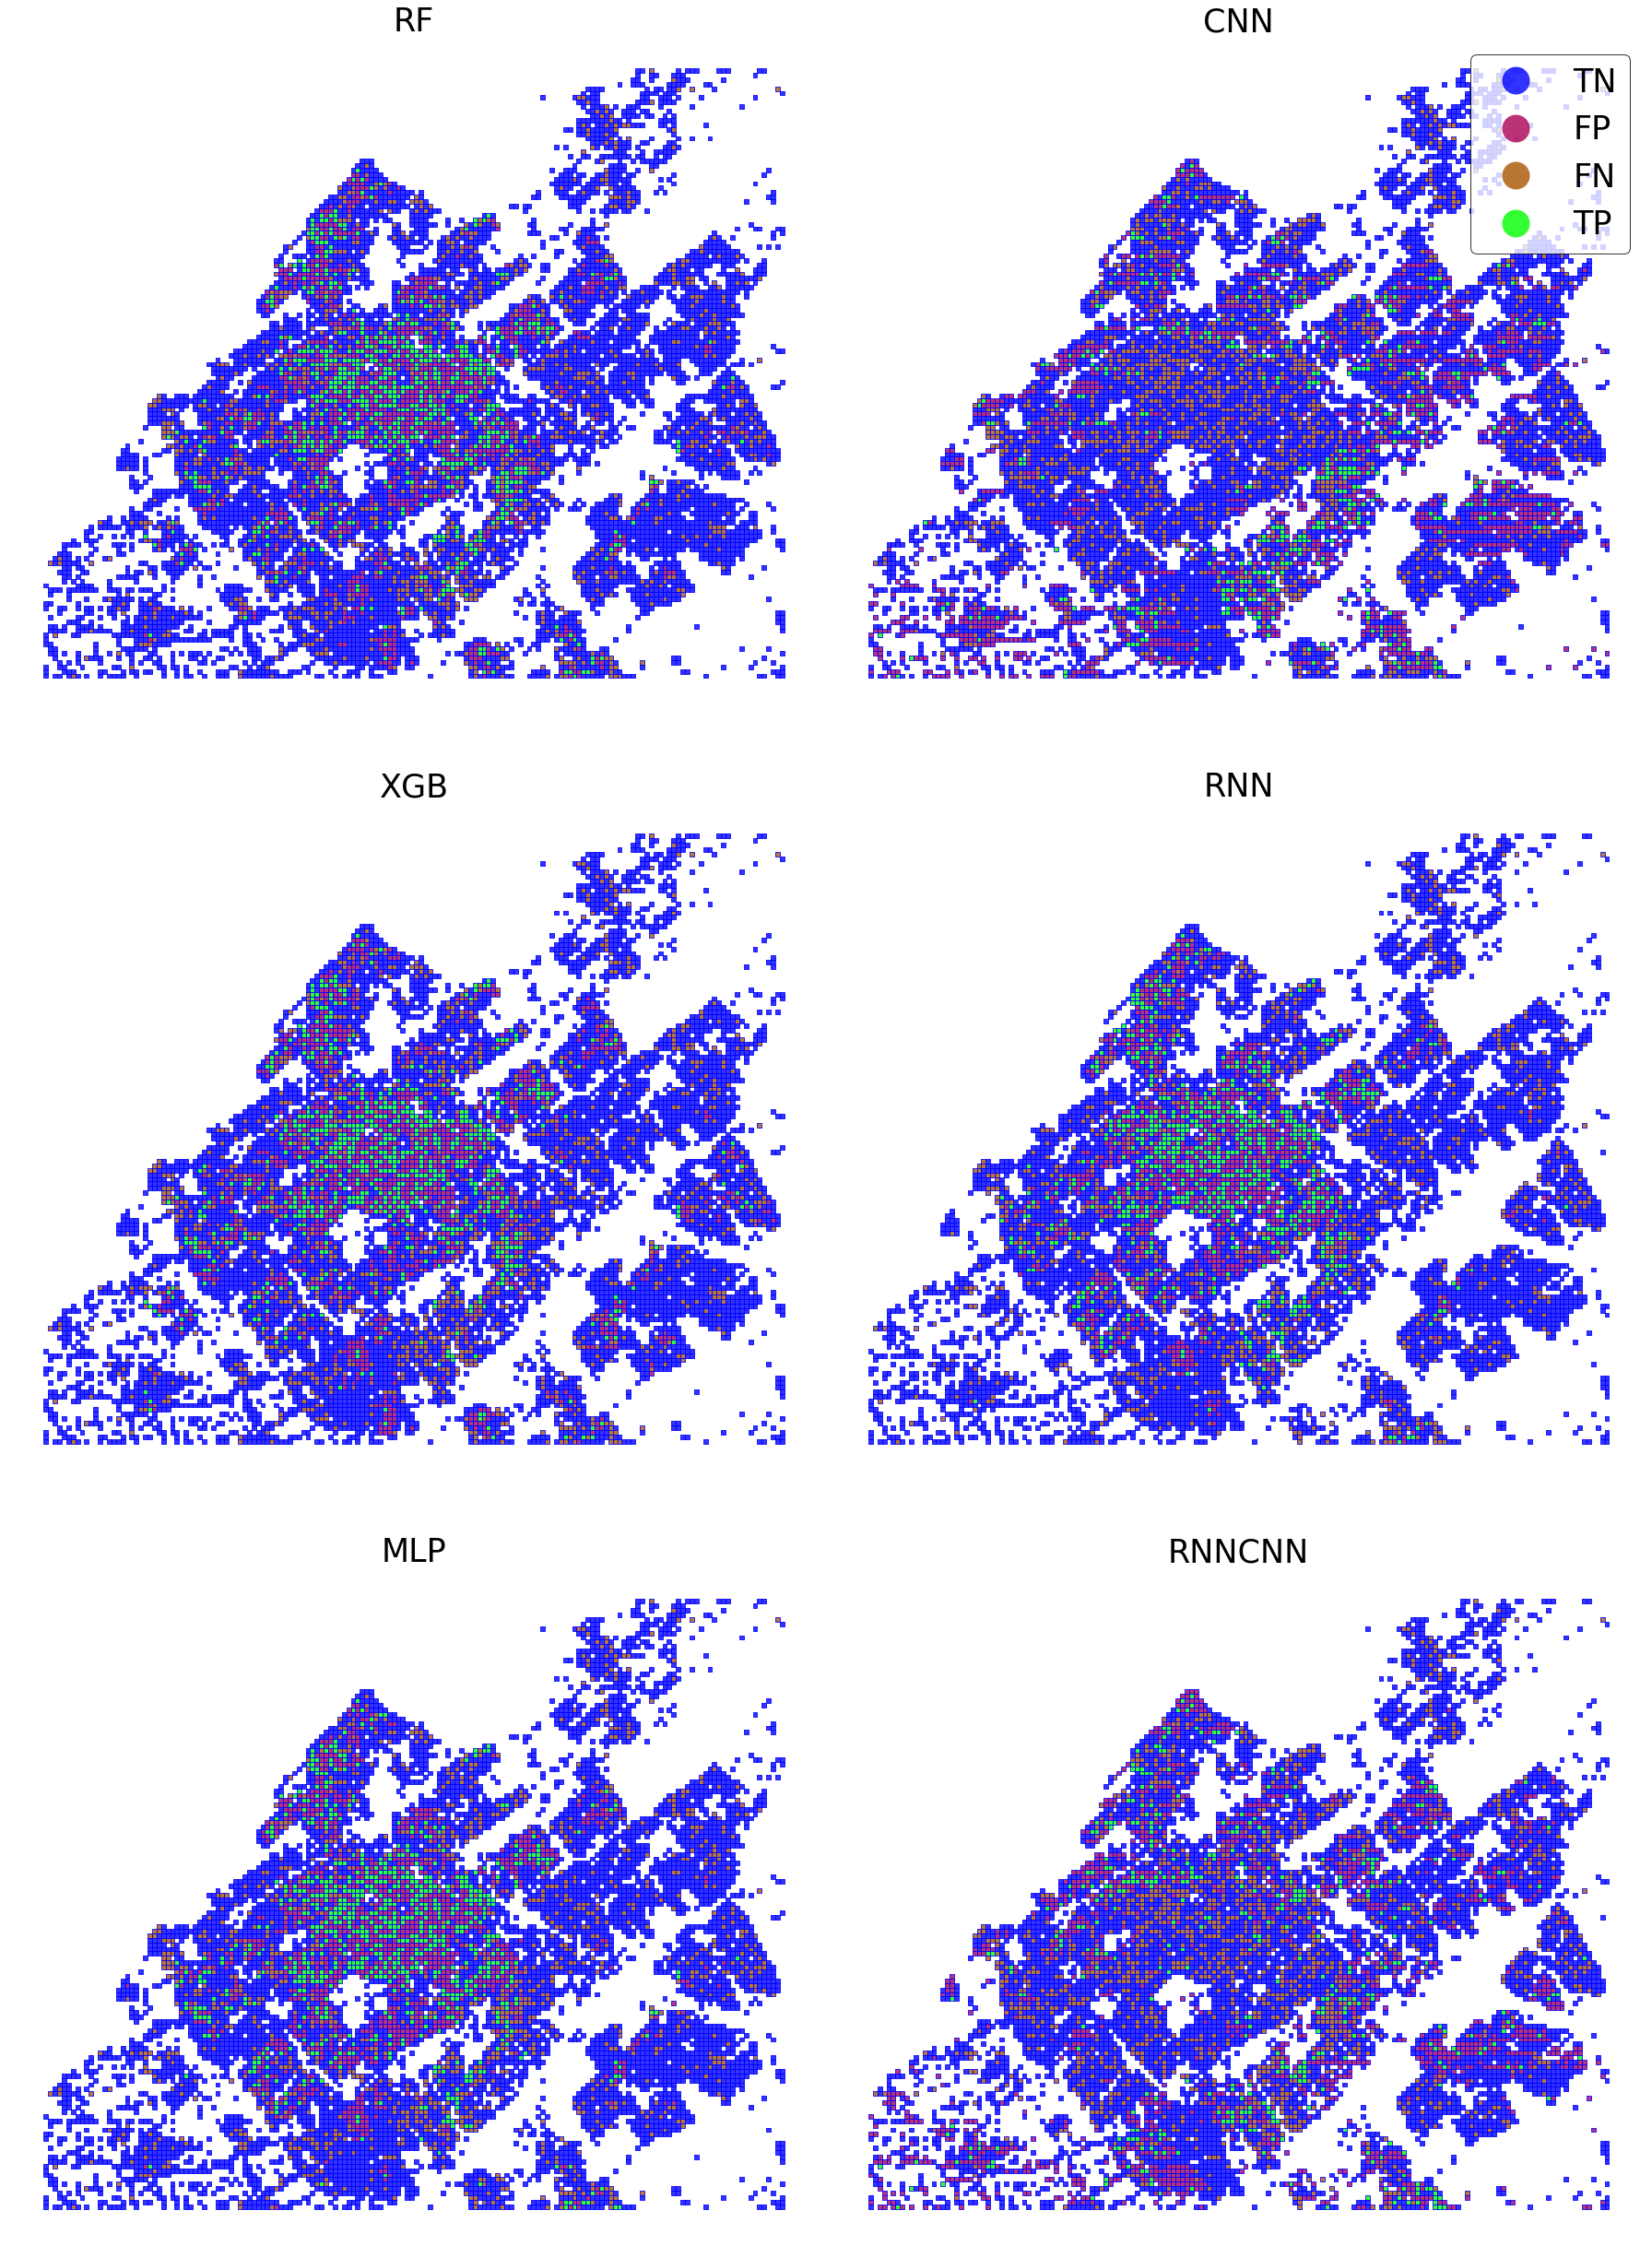

In [290]:
fig, ax = plt.subplots(3,2, figsize = (25,35))
for i, model in enumerate(["RF", "XGB","MLP", "CNN", "RNN", "RNNCNN"]):
    axposition = (i,0) if i < 3 else(i-3,1)
    ax[axposition].set_title(model, size = 35)
    ax[axposition].set_axis_off()
    if i <3:
        DH19.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
    elif i == 3:
        DH19.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":35}, "markerscale":3})
    else:
        DH.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
plt.tight_layout()

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
                
legend = ax[0,1].get_legend() 
for i in range(4):
    legend.legendHandles[i].set_markersize(400)
replace_legend_items(legend, mapper)

plt.savefig("../figures/denhaagerrormaps")

In [271]:
citycode = "NM"
with open("../results/"+ citycode + "RFpreds", 'rb') as file:
    RF = pickle.load(file)
pos = RF.argsort()[-(NM19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
NM19["preds"] = preds
NM19["checkedRF"] = NM19.apply(checker, axis = 1)

with open("../results/"+ citycode + "XGBpreds", 'rb') as file:
    XGB =  pickle.load(file)
pos = XGB.argsort()[-(NM19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
NM19["preds"] = preds
NM19["checkedXGB"] = NM19.apply(checker, axis = 1)

with open("../results/"+ citycode + "MLPpreds", 'rb') as file:
    MLP =  sigmoid(pickle.load(file))
pos = MLP.argsort()[-(NM19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
NM19["preds"] = preds
NM19["checkedMLP"] = NM19.apply(checker, axis = 1)

with open("../results/"+ citycode + "CNNpreds", 'rb') as file:
    CNN =  sigmoid(pickle.load(file))
pos = CNN.argsort()[-(NM19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
NM19["preds"] = preds
NM19["checkedCNN"] = NM19.apply(checker, axis = 1)

with open("../results/"+ citycode + "RNNpreds", 'rb') as file:
    RNN =  sigmoid(pickle.load(file))
pos = RNN.argsort()[-(NM.y == 1).sum() : ]
preds = np.zeros(len(RNN))
preds[pos] = 1
NM["preds"] = preds
NM["checkedRNN"] = NM.apply(checker, axis = 1)

with open("../results/"+ citycode + "RNNCNNpreds", 'rb') as file:
    RNNCNN = sigmoid(pickle.load(file))
pos = RNNCNN.argsort()[-(NM.y == 1).sum() : ]
preds = np.zeros(len(RNN))
preds[pos] = 1
NM["preds"] = preds
NM["checkedRNNCNN"] = NM.apply(checker, axis = 1)
    

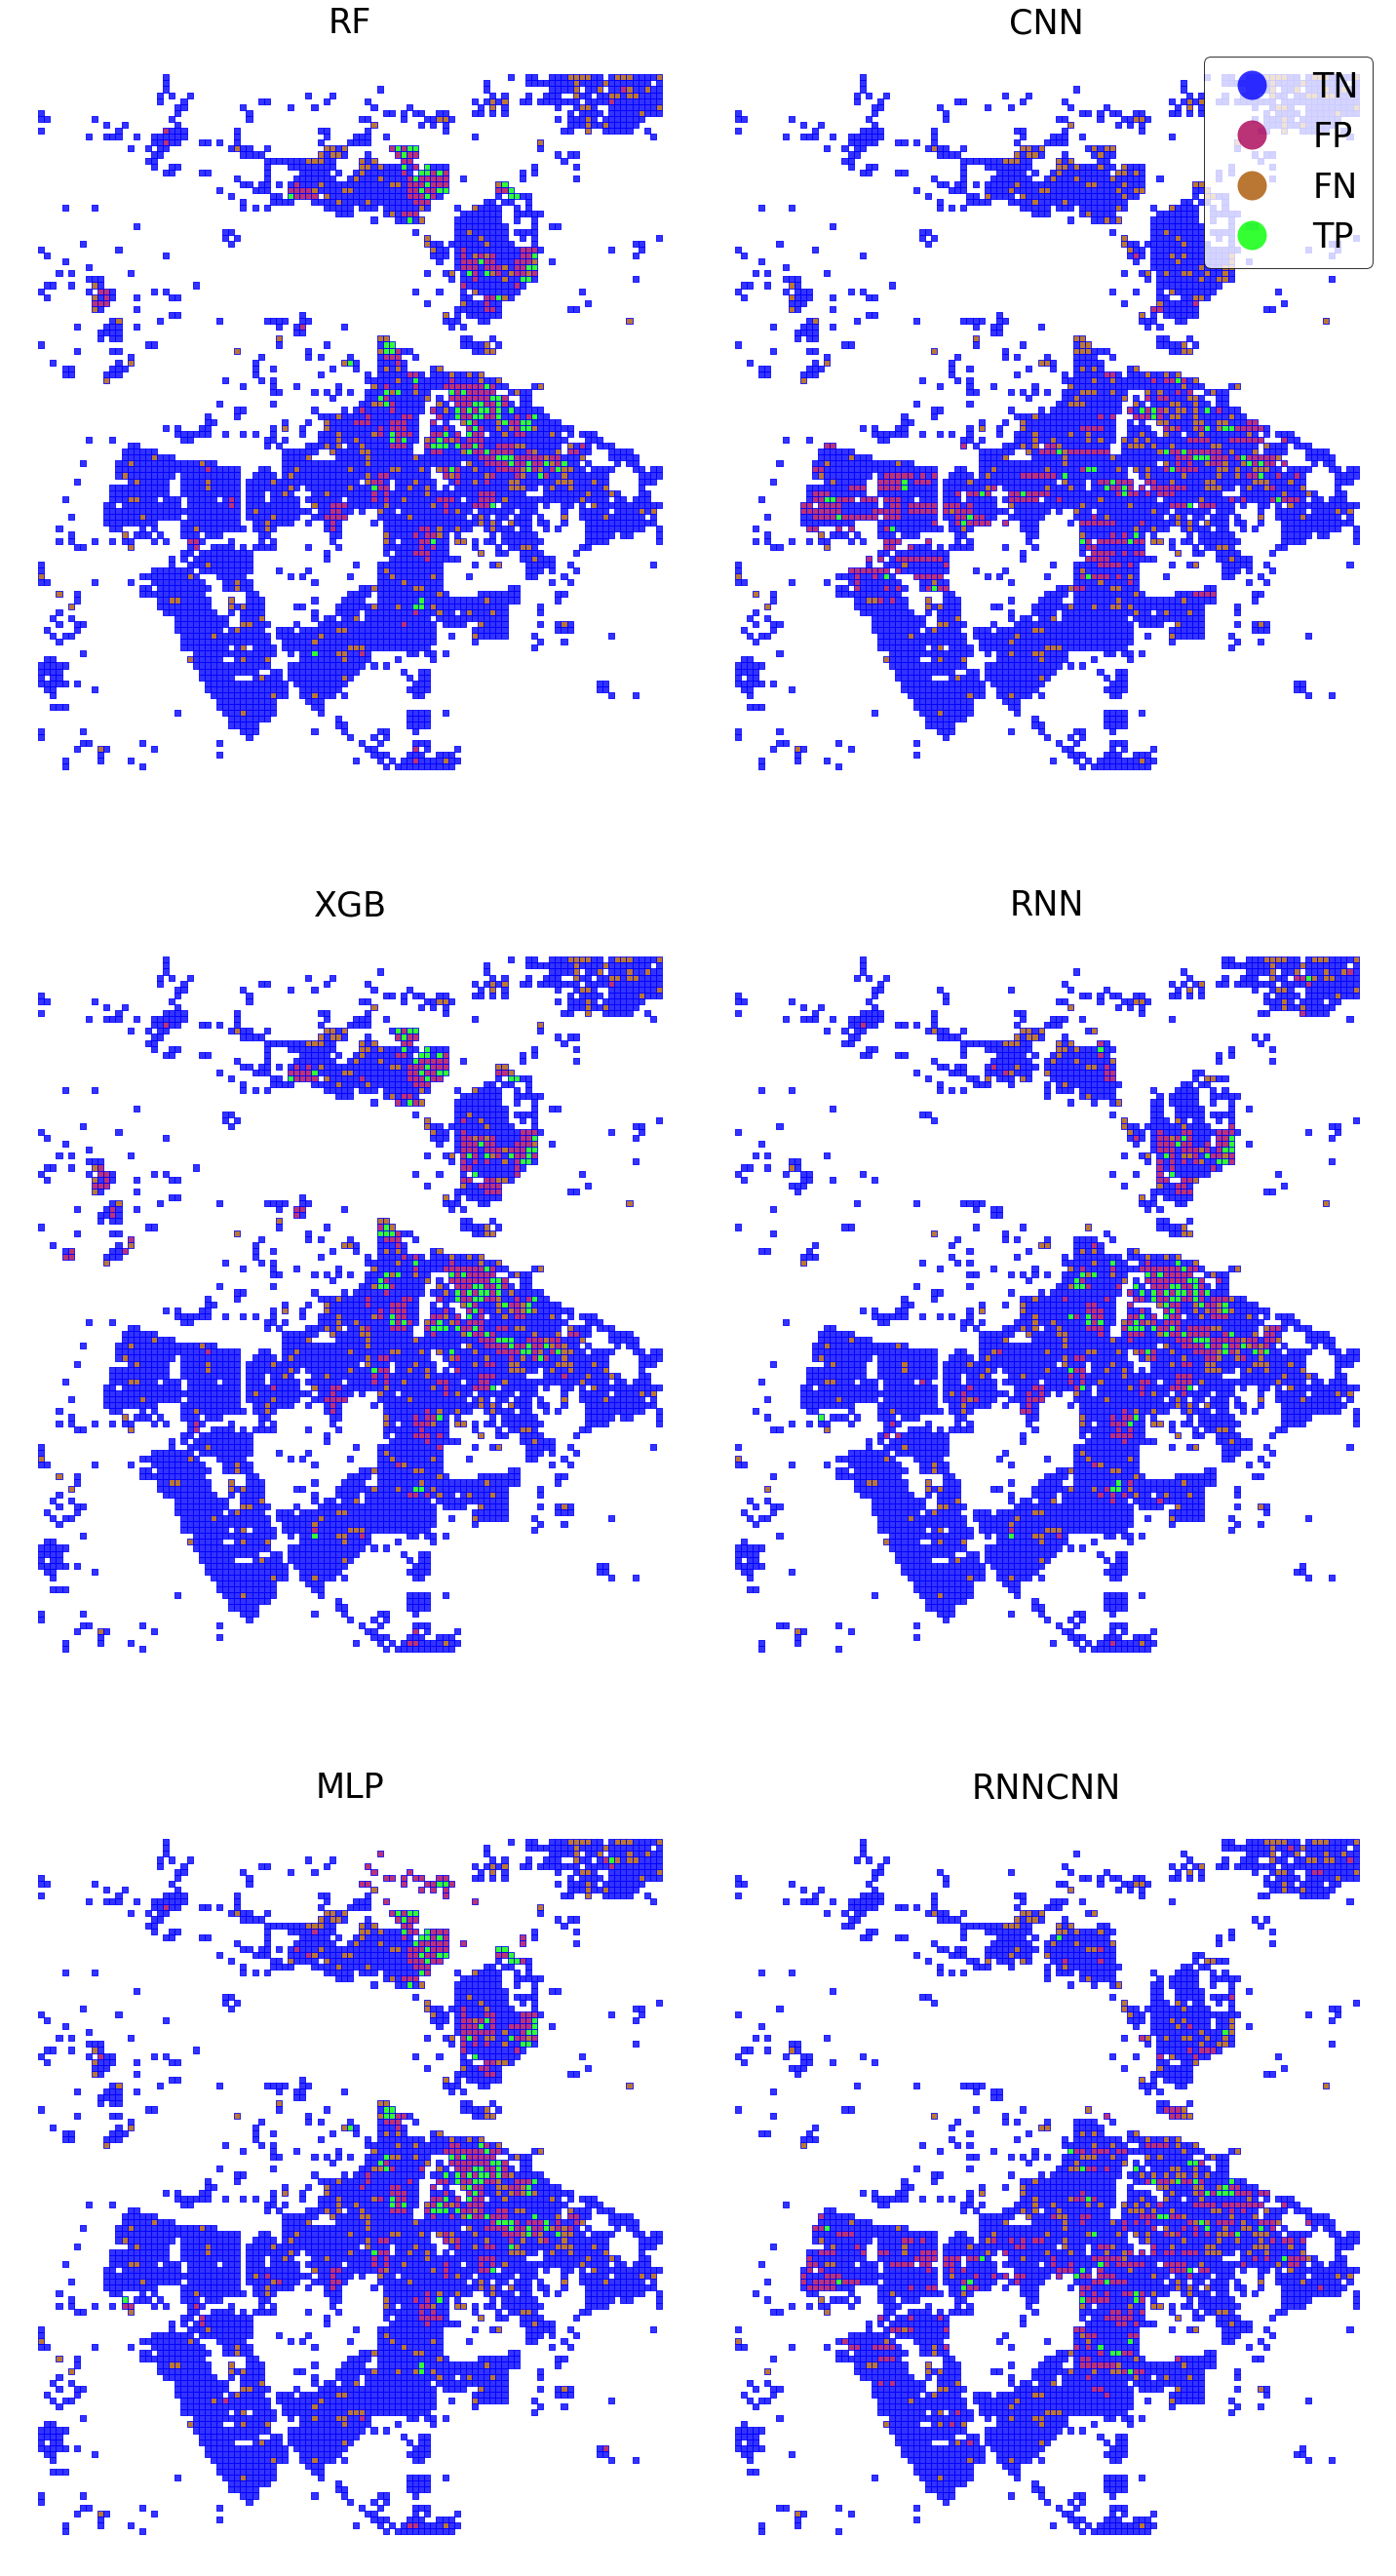

In [285]:
fig, ax = plt.subplots(3,2, figsize = (20,40))
for i, model in enumerate(["RF", "XGB","MLP", "CNN", "RNN", "RNNCNN"]):
    axposition = (i,0) if i < 3 else(i-3,1)
    ax[axposition].set_title(model, size = 35)
    ax[axposition].set_axis_off()
    if i <3:
        NM19.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
    elif i == 3:
        NM19.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":35}, "markerscale":3})
    else:
        NM.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
plt.tight_layout()

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
                
legend = ax[0,1].get_legend() 
for i in range(4):
    legend.legendHandles[i].set_markersize(400)
replace_legend_items(legend, mapper)
plt.tight_layout()
plt.savefig("../figures/nijmegenerrormaps.png")

In [278]:
citycode = "EH"
with open("../results/"+ citycode + "RFpreds", 'rb') as file:
    RF = pickle.load(file)
pos = RF.argsort()[-(EH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
EH19["preds"] = preds
EH19["checkedRF"] = EH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "XGBpreds", 'rb') as file:
    XGB =  pickle.load(file)
pos = XGB.argsort()[-(EH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
EH19["preds"] = preds
EH19["checkedXGB"] = EH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "MLPpreds", 'rb') as file:
    MLP =  sigmoid(pickle.load(file))
pos = MLP.argsort()[-(EH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
EH19["preds"] = preds
EH19["checkedMLP"] = EH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "CNNpreds", 'rb') as file:
    CNN =  sigmoid(pickle.load(file))
pos = CNN.argsort()[-(EH19.y == 1).sum() : ]
preds = np.zeros(len(RF))
preds[pos] = 1
EH19["preds"] = preds
EH19["checkedCNN"] = EH19.apply(checker, axis = 1)

with open("../results/"+ citycode + "RNNpreds", 'rb') as file:
    RNN =  sigmoid(pickle.load(file))
pos = RNN.argsort()[-(EH.y == 1).sum() : ]
preds = np.zeros(len(RNN))
preds[pos] = 1
EH["preds"] = preds
EH["checkedRNN"] = EH.apply(checker, axis = 1)

with open("../results/"+ citycode + "RNNCNNpreds", 'rb') as file:
    RNNCNN = sigmoid(pickle.load(file))
pos = RNNCNN.argsort()[-(EH.y == 1).sum() : ]
preds = np.zeros(len(RNN))
preds[pos] = 1
EH["preds"] = preds
EH["checkedRNNCNN"] =EH.apply(checker, axis = 1)
    

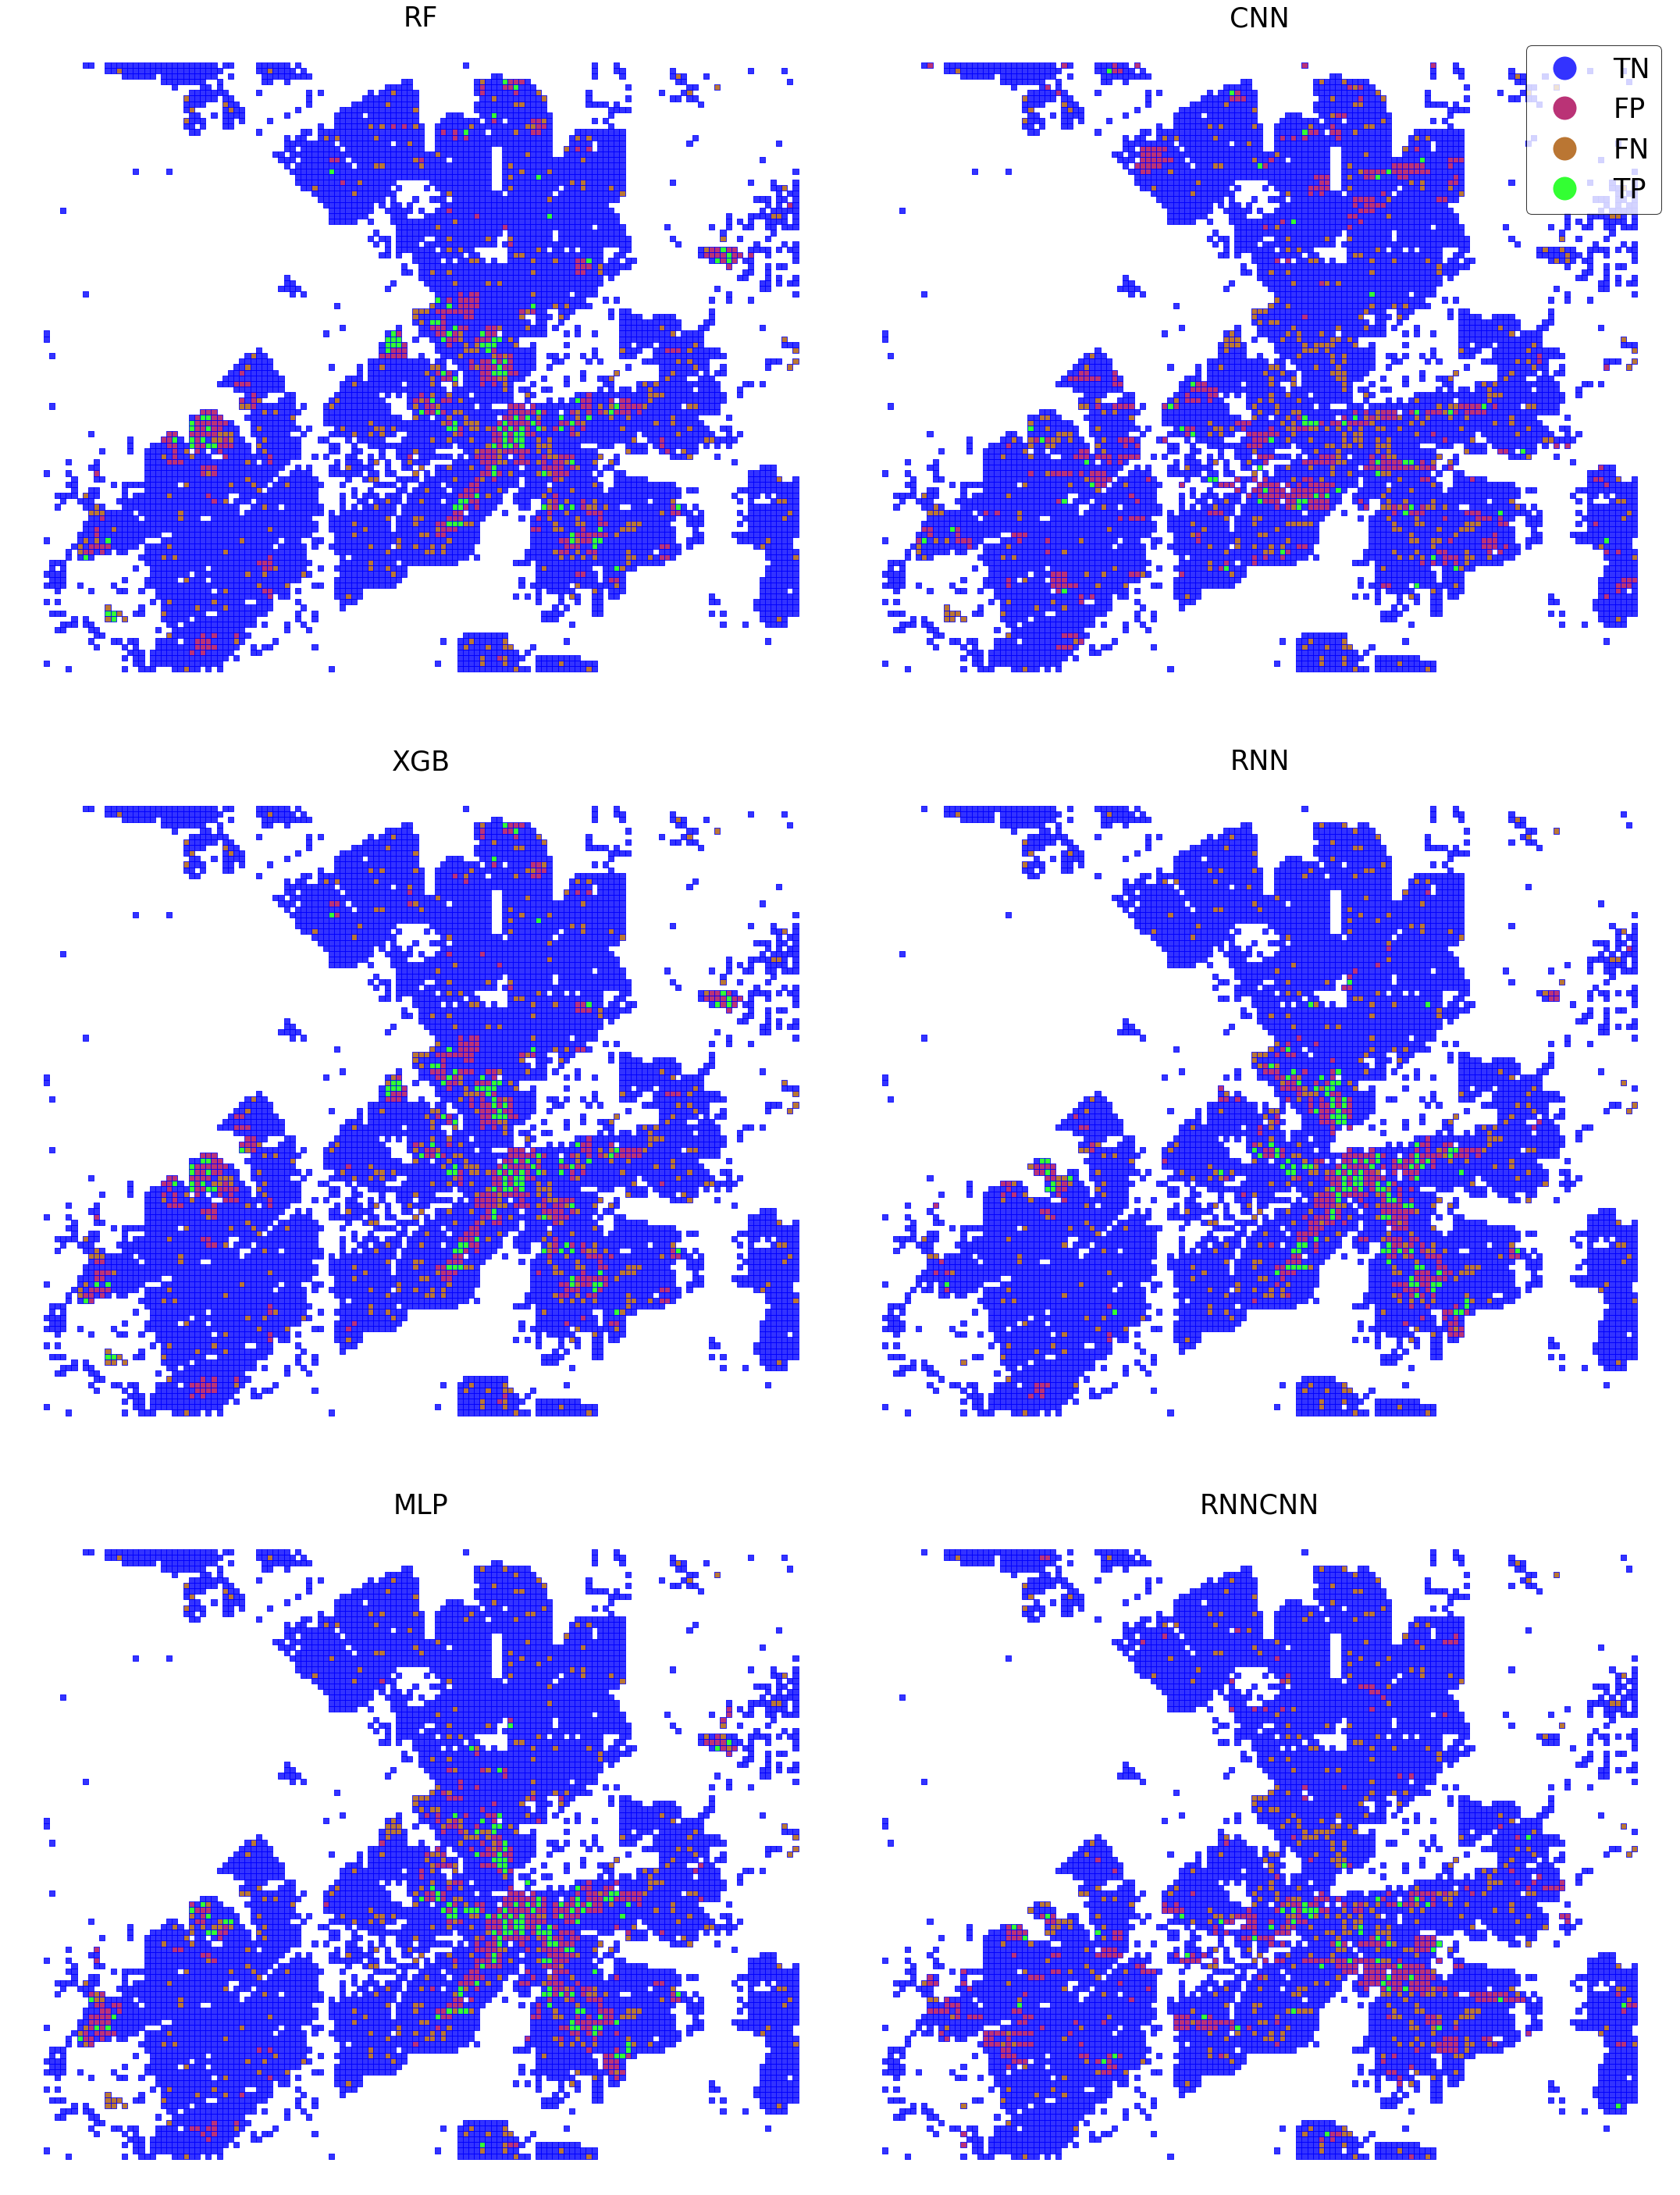

In [291]:
fig, ax = plt.subplots(3,2, figsize = (30,40))
for i, model in enumerate(["RF", "XGB","MLP", "CNN", "RNN", "RNNCNN"]):
    axposition = (i,0) if i < 3 else(i-3,1)
    ax[axposition].set_title(model, size = 35)
    ax[axposition].set_axis_off()
    if i <3:
        EH19.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
    elif i == 3:
        EH19.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b", legend = True, legend_kwds={"frameon" : True, "edgecolor":"black","prop":{"size":35}, "markerscale":3})
    else:
        EH.plot( cmap = "brg", column = "checked" + model, ax = ax[axposition], categorical=True, alpha=0.8, edgecolor = "b")
plt.tight_layout()

def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
                
legend = ax[0,1].get_legend() 
for i in range(4):
    legend.legendHandles[i].set_markersize(400)
replace_legend_items(legend, mapper)

plt.savefig("../figures/eindhovenerrormaps.png")

# feature importance

In [166]:
import xgboost

In [167]:
DHx = xgboost.XGBClassifier()
DHx.load_model("../Results/XGBDHmodel")
NMx = xgboost.XGBClassifier()
NMx.load_model("../Results/XGBNMmodel")
EHx = xgboost.XGBClassifier()
EHx.load_model("../Results/XGBEHmodel")

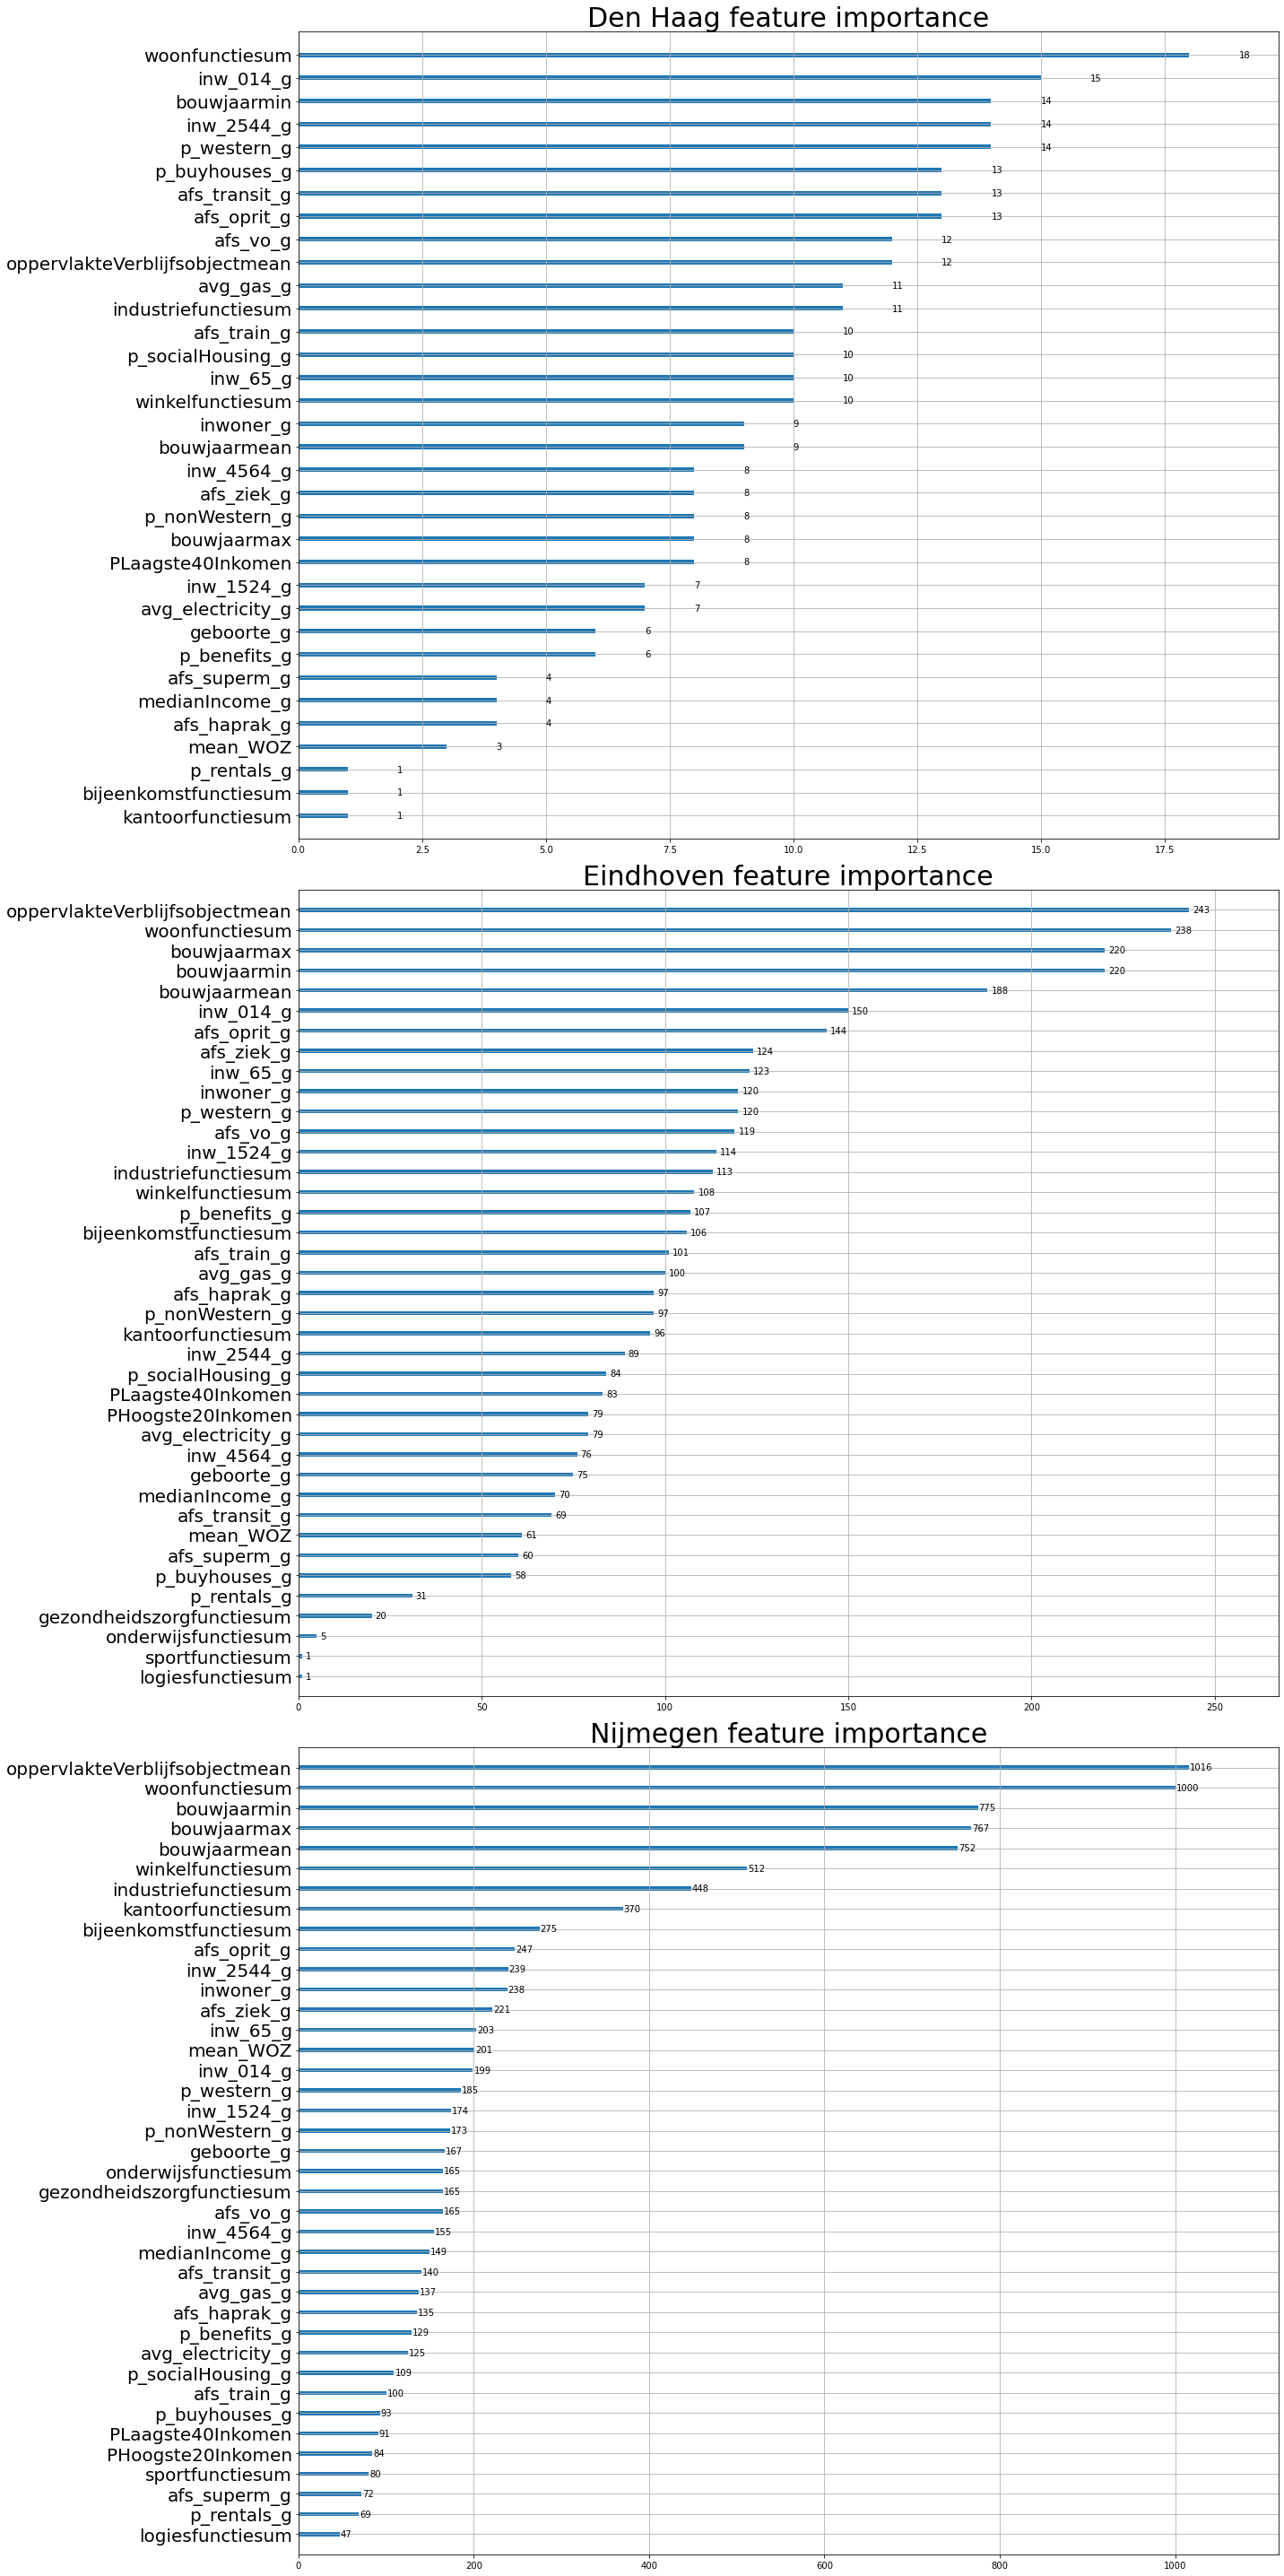

In [220]:
def change_them_ticks(ax):
    Text_yticklabels = list(ax.get_yticklabels())
    dict_features = dict(enumerate(DH.columns))
    lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
    lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]
    return lst_yticklabels

fig, ax = plt.subplots(3, figsize = (20,40))
xgboost.plot_importance(DHx, ax = ax[0])
xgboost.plot_importance(EHx, ax = ax[1])
xgboost.plot_importance(NMx, ax = ax[2])

ax[0].set_title("Den Haag feature importance", size = 30)
ax[0].set_yticklabels(change_them_ticks(ax[0]), size = 20)
ax[1].set_title("Eindhoven feature importance", size = 30)
ax[1].set_yticklabels(change_them_ticks(ax[1]), size = 20)
ax[2].set_title("Nijmegen feature importance", size = 30)
ax[2].set_yticklabels(change_them_ticks(ax[2]), size = 20)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("")

ax[0].set_ylabel("")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
plt.tight_layout()

plt.savefig("../figures/featureimportance.png")

In [203]:
Text_yticklabels = list(ax[1].get_yticklabels())
dict_features = dict(enumerate(DH.columns))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

ax[1].set_yticklabels(lst_yticklabels)

TypeError: argument of type 'Text' is not iterable

In [182]:
DH.columns[:-6]

Index(['bijeenkomstfunctiesum', 'gezondheidszorgfunctiesum',
       'industriefunctiesum', 'kantoorfunctiesum', 'logiesfunctiesum',
       'onderwijsfunctiesum', 'sportfunctiesum', 'winkelfunctiesum',
       'woonfunctiesum', 'oppervlakteVerblijfsobjectmean', 'inwoner_g',
       'geboorte_g', 'inw_014_g', 'inw_1524_g', 'inw_2544_g', 'inw_4564_g',
       'inw_65_g', 'p_western_g', 'p_nonWestern_g', 'p_buyhouses_g',
       'p_rentals_g', 'p_socialHousing_g', 'medianIncome_g',
       'avg_electricity_g', 'avg_gas_g', 'p_benefits_g', 'afs_haprak_g',
       'afs_ziek_g', 'afs_superm_g', 'afs_vo_g', 'afs_oprit_g', 'afs_train_g',
       'afs_transit_g', 'mean_WOZ', 'PLaagste40Inkomen', 'PHoogste20Inkomen',
       'bouwjaarmean', 'bouwjaarmin', 'bouwjaarmax', 'y-1'],
      dtype='object')

In [142]:
EHx.get_booster().feature_names

In [145]:
DHx.get_booster().feature_names = DH.columns

In [156]:
import xgboost as xgb

In [164]:
DHx.get_booster().feature_names = DH.columns

# city tables


In [8]:
print(DH19.shape)
print(NM19.shape)
print(EH19.shape)

(9182, 43)
(3681, 43)
(6174, 43)


In [9]:
print(DH19.woonfunctiesum.sum())
print(NM19.woonfunctiesum.sum())
print(EH19.woonfunctiesum.sum())

226151.0
85950.0
140599.0


# Ensebmle

In [82]:
DH = pd.read_excel("../Results/ensembleDH.xlsx")

In [83]:
DH = DH.drop([0,1])

In [84]:
DH = DH.set_index("Type")
DH.columns = [["Mean_AUC", "Mean_F1", "Median_AUC", "Median_F1"]]
DH = DH.astype(float)

In [85]:
DH.max()

Mean_AUC      0.685938
Mean_F1       0.398882
Median_AUC    0.688635
Median_F1     0.401423
dtype: object

In [89]:
DH.idxmax()

Mean_AUC          MLP, RNN
Mean_F1           MLP, RNN
Median_AUC    RF, MLP, RNN
Median_F1     RF, MLP, RNN
dtype: object

In [90]:
EH = pd.read_excel("../Results/ensembleEH.xlsx")
EH = EH.drop([0,1])
EH = EH.set_index("Type")
EH.columns = [["Mean_AUC", "Mean_F1", "Median_AUC", "Median_F1"]]
EH = EH.astype(float)

In [91]:
EH.max()

Mean_AUC      0.695700
Mean_F1       0.262940
Median_AUC    0.694841
Median_F1     0.265010
dtype: float64

In [92]:
EH.idxmax()

Mean_AUC      XGB, MLP, RNN, RNNCNN
Mean_F1               MLP, CNN, RNN
Median_AUC                 XGB, RNN
Median_F1             XGB, CNN, RNN
dtype: object

In [93]:
NM = pd.read_excel("../Results/ensembleNM.xlsx")
NM = NM.drop([0,1])
NM = NM.set_index("Type")
NM.columns = [["Mean_AUC", "Mean_F1", "Median_AUC", "Median_F1"]]
NM = NM.astype(float)

In [95]:
NM.max()

Mean_AUC      0.663756
Mean_F1       0.236915
Median_AUC    0.663756
Median_F1     0.239669
dtype: float64

In [96]:
NM.idxmax()

Mean_AUC             MLP, RNN
Mean_F1       RF, XGB, RNNCNN
Median_AUC           MLP, RNN
Median_F1        RF, MLP, RNN
dtype: object